<center><h1><u>Dogs vs Cats</u></h1></center>
<center><h3>Binary Classification using different CNN architectures (VGG16, InceptionV3, ResNet50)</h3></center>

<center><img src="Balltze.png" width="400"></center>
<center><h4>Credit: balltze (Instagram)</h4></center>

<h4><i>Necessary Imports</i></h4>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from matplotlib.image import imread
from os import listdir
from os import getcwd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow
#from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50
from sklearn.metrics import classification_report
import scikitplot as skplt

In [ ]:
#np.random.seed(1)
#tensorflow.set_random_seed(2)

<h4><i>Load tensorboard and Datetime</i></h4>

In [2]:
%load_ext tensorboard
#%reload_ext tensorboard
import datetime
!rm -rf ./logs/

<h4><i>first 9 dog images</i></h4>

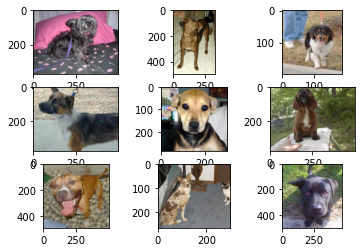

In [3]:
folder = 'train/'
for i in range(9):
    plt.subplot(330 + 1 + i)
    filename = folder + 'dog.' + str(i) + '.jpg'
    image = plt.imread(filename)
    plt.imshow(image)

plt.show()

<h4><i>first 9 cat images</i></h4>

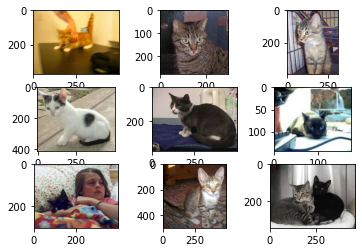

In [4]:
folder = 'train/'
for i in range(9):
    plt.subplot(330 + 1 + i)
    filename = folder + 'cat.' + str(i) + '.jpg'
    image = plt.imread(filename)
    plt.imshow(image)

plt.show()

<h4><i>Load and preprocess images, (200,200,3)</i></h4>

In [5]:
folder = 'train/'
photos, labels = list(), list()

for file in listdir(folder):
    output = 0.0
    if file.startswith('cat'):
        output = 1.0
    
    photo = load_img(folder + file, target_size=(200, 200))
    photo = img_to_array(photo)
    
    photos.append(photo)
    labels.append(output)

photos = np.asarray(photos)
labels = np.asarray(labels)
print(photos.shape, labels.shape)

(25000, 200, 200, 3) (25000,)


In [ ]:
getcwd()

In [ ]:
#np.save('dogs_vs_cats_photos.npy', photos)
#np.save('dogs_vs_cats_labels.npy', labels)

# photos = np.load('dogs_vs_cats_photos.npy')
# labels = np.load('dogs_vs_cats_labels.npy')

# print(photos.shape)
# print(labels.shape)

<h4><i>Convert and scale the images</i></h4>

In [6]:
labels = labels.reshape((25000, 1))

photos = photos.astype(np.float32)
photos = photos/255

[1.]


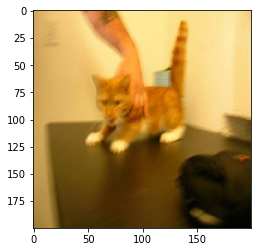

In [7]:
plt.imshow(photos[0])
print(labels[0])

<h4><i>Train test splits. Recommended value for test sizes - [0.1, 0.2, 0.25]</i></h4>

In [8]:
X_train, X_test, y_train, y_test = train_test_split(photos, labels, test_size = 0.2, random_state = 42)

Train X shape: (20000, 200, 200, 3)
Train y shape: (20000, 1)
Test X shape: (5000, 200, 200, 3)
Test y shape: (5000, 1)
[0.]


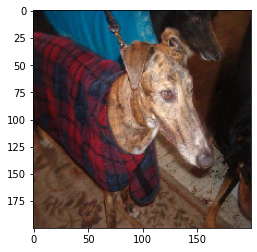

In [9]:
print('Train X shape:', X_train.shape)
print('Train y shape:', y_train.shape)
print('Test X shape:', X_test.shape)
print('Test y shape:', y_test.shape)

plt.imshow(X_train[0])
print(y_train[0])

<h4><i>Define Model architecture</i></h4>
<h4><i>Input Size : (200, 200, 3)</i></h4>
<h3>Model: Dropout to reduce Overfitting (3-block VGG)</h3>

In [2]:
#FUNCTION TO BUILD THE MODEL
def create_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())

    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    return model

In [2]:
#FUNCTION TO COMPILE MODEL
def compile_model(model, opt, loss_f, metric):
    model.compile(optimizer=opt, loss=loss_f, metrics=[metric])

In [3]:
#FUNCTION TO PLOT THE LEARNING CURVE
def learning_curve(history_obj, title):
    pd.DataFrame(history_obj.history).plot(figsize=(12,9))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.xlabel('no of epochs')
    plt.title('Training Curve')
    plt.savefig(title)
    plt.show()

<h4><i>Create Model.</i></h4>

In [13]:
model = create_model()

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 200, 200, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 100, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0

<h4><i><u>Compile the model</u></i></h4>

In [17]:
compile_model(model,'adam','binary_crossentropy','accuracy')

<h4><i>Tensorboard Settings</i></h4>

In [18]:
log_dir = "logs\\fit\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tensorflow.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [19]:
#Feel free to tweak the number of epochs
history = model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=1, 
                    validation_data= (X_test, y_test), callbacks=[tensorboard_callback])

Train on 20000 samples, validate on 5000 samples
Epoch 1/25
20000/20000 [==============================] - 46s 2ms/sample - loss: 1.0463 - accuracy: 0.5973 - val_loss: 1.3464 - val_accuracy: 0.6220
Epoch 2/25
20000/20000 [==============================] - 39s 2ms/sample - loss: 0.6160 - accuracy: 0.6471 - val_loss: 0.5937 - val_accuracy: 0.7288
Epoch 3/25
20000/20000 [==============================] - 38s 2ms/sample - loss: 0.5899 - accuracy: 0.6756 - val_loss: 0.5589 - val_accuracy: 0.7484
Epoch 4/25
20000/20000 [==============================] - 38s 2ms/sample - loss: 0.5524 - accuracy: 0.7150 - val_loss: 0.5030 - val_accuracy: 0.7670
Epoch 5/25
20000/20000 [==============================] - 38s 2ms/sample - loss: 0.5080 - accuracy: 0.7505 - val_loss: 0.4736 - val_accuracy: 0.8004
Epoch 6/25
20000/20000 [==============================] - 38s 2ms/sample - loss: 0.4870 - accuracy: 0.7632 - val_loss: 0.4703 - val_accuracy: 0.7926
Epoch 7/25
20000/20000 [==============================] -

<h4><i>Open Tensorboard to see progress</i></h4>

In [4]:
#%tensorboard --logdir logs/fit

<h4><i>Matplotlib alternative</i></h4>

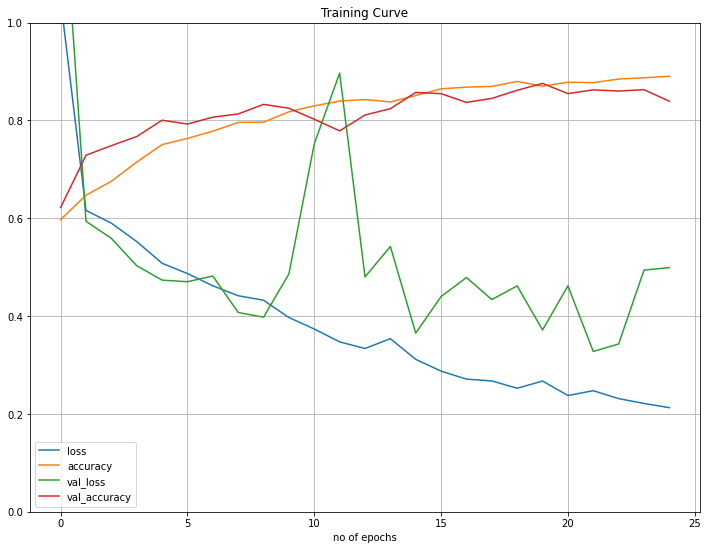

In [26]:
learning_curve(history, 'Training_Curve_with_Dropout.jpg')

<h4><i>Evaluate the Model</i></h4>

In [41]:
loss, accuracy = model.evaluate(X_test, y_test)

print('Loss:', format(loss*100, ',.2f'),'% ||','Accuracy:',format(accuracy*100, ',.2f'),'%')

5000/5000 [==============================] - 3s 506us/sample - loss: 0.4991 - accuracy: 0.8392
Loss: 49.91 % || Accuracy: 83.92 %


<h4><i>Save the model</i></h4>

In [22]:
#model.save("Base_model_with_Dropout")
model = tensorflow.keras.models.load_model("Base_model_with_Dropout")

<h3>Model1: with L2 Regularization (lambda = 0.01)</h3>

In [27]:
model1 = Sequential()
#1st block
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer = tensorflow.keras.regularizers.l2(l=0.01), 
                  kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2, 2)))


#2nd block
model1.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = tensorflow.keras.regularizers.l2(l=0.01), 
                  kernel_initializer='he_uniform', padding='same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2, 2)))


#3rd block
model1.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer = tensorflow.keras.regularizers.l2(l=0.01), 
                  kernel_initializer='he_uniform', padding='same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2, 2)))

model1.add(Flatten())

#FC layers
model1.add(Dense(128, activation='relu', kernel_regularizer = tensorflow.keras.regularizers.l2(l=0.01), 
                 kernel_initializer='he_uniform'))
model1.add(Dense(1, activation='sigmoid'))

In [28]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 200, 200, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 100, 100, 64)      256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 128)      

<h4><i><u>Compile the model</u></i></h4>

In [30]:
compile_model(model1,'adam','binary_crossentropy','accuracy')

<h4><i><u>model1: L2</u></i></h4>

In [31]:
#Feel free to tweak the number of epochs
history = model1.fit(X_train, y_train, epochs=25, batch_size=32, verbose=1, 
                     validation_data= (X_test, y_test), callbacks=[tensorboard_callback])

Train on 20000 samples, validate on 5000 samples
Epoch 1/25
20000/20000 [==============================] - 39s 2ms/sample - loss: 3.8756 - accuracy: 0.6844 - val_loss: 1.5016 - val_accuracy: 0.7142
Epoch 2/25
20000/20000 [==============================] - 37s 2ms/sample - loss: 1.2331 - accuracy: 0.7429 - val_loss: 2.9066 - val_accuracy: 0.5418
Epoch 3/25
20000/20000 [==============================] - 37s 2ms/sample - loss: 1.0181 - accuracy: 0.7699 - val_loss: 0.9752 - val_accuracy: 0.6464
Epoch 4/25
20000/20000 [==============================] - 37s 2ms/sample - loss: 0.7301 - accuracy: 0.7911 - val_loss: 0.8965 - val_accuracy: 0.6896
Epoch 5/25
20000/20000 [==============================] - 37s 2ms/sample - loss: 0.7539 - accuracy: 0.7961 - val_loss: 0.9388 - val_accuracy: 0.6472
Epoch 6/25
20000/20000 [==============================] - 37s 2ms/sample - loss: 0.6912 - accuracy: 0.8112 - val_loss: 0.9149 - val_accuracy: 0.5978
Epoch 7/25
20000/20000 [==============================] -

<h3>Note: Go to <u>localhost:6006</u> to see progress as Tensorboard is already up and running</h3>
<h4><i>Matplotlib alternative</i></h4>

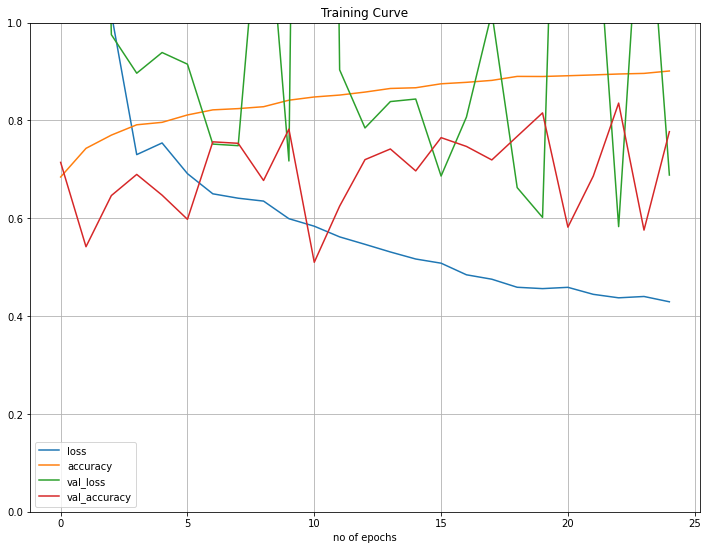

In [32]:
learning_curve(history, 'Training_Curve_with_L2_Regularization.jpg')

In [42]:
loss, accuracy = model1.evaluate(X_test, y_test)

print('Loss:', format(loss*100, ',.2f'),'% ||','Accuracy:',format(accuracy*100, ',.2f'),'%')

5000/5000 [==============================] - 3s 509us/sample - loss: 0.6883 - accuracy: 0.7770
Loss: 68.83 % || Accuracy: 77.70 %


<center><img src="Cheems.jpg" width="800"></center>
<center><h4>This doesn't mean one is better than the other. Dropout worked well here, that's all.</h4></center>

<h2><u>Image Augmentation with Keras</u></h2>

<h4><i>Train data generator</i></h4>

In [49]:
data_generator = ImageDataGenerator(rotation_range = 15,
                                   horizontal_flip = True,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   zoom_range = [0.5,1.5],
                                   fill_mode = 'nearest',
                                   data_format = 'channels_last')
data_generator.fit(X_train)

<h4><i>Validation(test) data generator</i></h4>

In [50]:
valid_generator = ImageDataGenerator(data_format = 'channels_last')
valid_generator.fit(X_test)

<h4><i>Model2: Uses Augmented data with Dropout</i></h4>

In [51]:
model2 = create_model()

In [52]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
batch_normalization_9 (Batch (None, 200, 200, 32)      128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 100, 100, 64)      18496     
_________________________________________________________________
batch_normalization_10 (Batc (None, 100, 100, 64)      256       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 50, 50, 64)       

In [53]:
#compile the model
compile_model(model2, 'adam', 'binary_crossentropy', 'accuracy')

<h4><i>Batch Size = 32 or 64</i></h4>

In [54]:
history1 = model2.fit(data_generator.flow(X_train, y_train, batch_size = 32), steps_per_epoch = len(X_train)//32, 
                     epochs = 15, verbose = 1, validation_data = valid_generator.flow(X_test, y_test, batch_size = 32), 
                     validation_steps = len(X_test)//32)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 625 steps, validate for 156 steps
Epoch 1/15
625/625 [==============================] - 168s 268ms/step - loss: 1.4047 - accuracy: 0.5660 - val_loss: 0.7693 - val_accuracy: 0.5933
Epoch 2/15
625/625 [==============================] - 141s 226ms/step - loss: 0.6611 - accuracy: 0.5934 - val_loss: 0.8295 - val_accuracy: 0.6202
Epoch 3/15
625/625 [==============================] - 141s 226ms/step - loss: 0.6495 - accuracy: 0.6172 - val_loss: 0.6223 - val_accuracy: 0.6685
Epoch 4/15
625/625 [==============================] - 141s 225ms/step - loss: 0.6372 - accuracy: 0.6313 - val_loss: 0.6308 - val_accuracy: 0.6937
Epoch 5/15
625/625 [==============================] - 142s 227ms/step - loss: 0.6318 - accuracy: 0.6413 - val_loss: 0.6151 - val_accuracy: 0.6552
Epoch 6/15
625/625 [==============================] - 140s 225ms/step - loss: 0.6283 - accuracy: 0.6557 - val_loss: 0.6492 - val_accuracy: 0.6817
Epoch 7/15
625/625 [==========

In [56]:
history1 = model2.fit(data_generator.flow(X_train, y_train, batch_size = 32), steps_per_epoch = len(X_train)//32, 
                     epochs = 15, verbose = 1, validation_data = valid_generator.flow(X_test, y_test, batch_size = 32), 
                     validation_steps = len(X_test)//32)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 625 steps, validate for 156 steps
Epoch 1/15
625/625 [==============================] - 141s 226ms/step - loss: 0.5298 - accuracy: 0.7534 - val_loss: 0.4477 - val_accuracy: 0.8123
Epoch 2/15
625/625 [==============================] - 141s 226ms/step - loss: 0.5299 - accuracy: 0.7548 - val_loss: 0.4814 - val_accuracy: 0.7772
Epoch 3/15
625/625 [==============================] - 140s 225ms/step - loss: 0.5237 - accuracy: 0.7563 - val_loss: 0.4466 - val_accuracy: 0.8125
Epoch 4/15
625/625 [==============================] - 141s 225ms/step - loss: 0.5156 - accuracy: 0.7635 - val_loss: 0.3910 - val_accuracy: 0.8536
Epoch 5/15
625/625 [==============================] - 140s 224ms/step - loss: 0.5155 - accuracy: 0.7617 - val_loss: 0.4331 - val_accuracy: 0.8145
Epoch 6/15
625/625 [==============================] - 140s 224ms/step - loss: 0.5304 - accuracy: 0.7548 - val_loss: 0.4600 - val_accuracy: 0.7929
Epoch 7/15
625/625 [==========

In [23]:
#model2.save("Model_trained_on_Augmented_Data")
model2 = tensorflow.keras.models.load_model("Model_trained_on_Augmented_Data")

In [58]:
loss, accuracy = model2.evaluate(X_test, y_test)

print('Loss:', format(loss*100, ',.2f'),'% ||','Accuracy:',format(accuracy*100, ',.2f'),'%')

5000/5000 [==============================] - 3s 562us/sample - loss: 0.3709 - accuracy: 0.8700
Loss: 37.09 % || Accuracy: 87.00 %


<h4><i>Matplotlib alternative</i></h4>

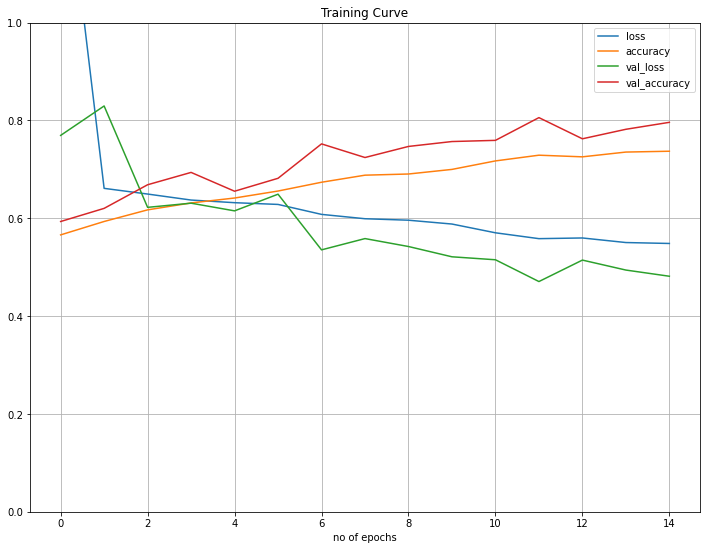

In [55]:
learning_curve(history1, 'Training_Curve_for_Augmented_Data_with_Dropout.jpg')

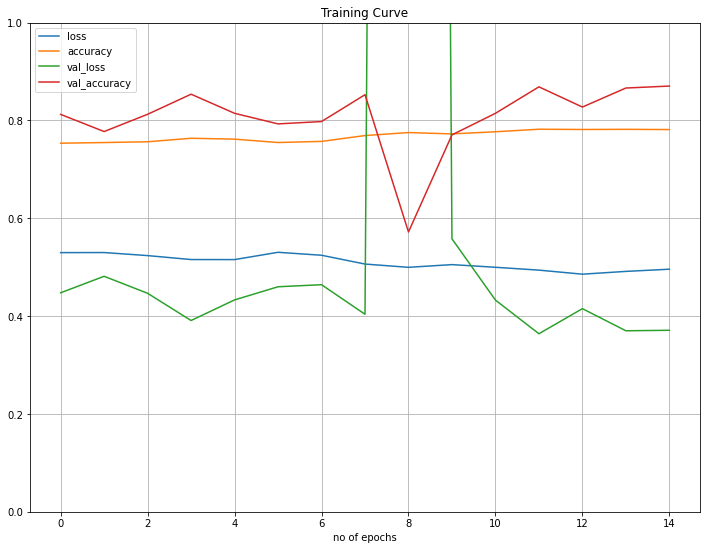

In [57]:
learning_curve(history1, 'Training_Curve_for_Augmented_Data_with_Dropout1.jpg')

<center><video controls src="happy.mp4" muted=True/></center>
<center><h4>Credit: Anavicoes (Instagram)</h4></center>

<h2><u>Transfer Learning in Keras</u></h2>

<h2><i>Reload the training set with input shape <u>(224, 224)</u> for ResNet/VGG16/VGG19. <u>(299,299)</u> for Inception</i></h2>

<h4><u>Tweak this and rerun the cells below till</u><i>  "valid_generator"  </i><u>Step in case of Inception</u></h4>

In [5]:
img_size = 224

<h4><i>Out-of-Core Learning (If the dataset doesn't fit into your memory</i></h4>

In [ ]:
# train_datagen = ImageDataGenerator(
#     rescale=1.0/255,
#     rotation_range = 15,
#     horizontal_flip = True,
#     width_shift_range = 0.1,
#     height_shift_range = 0.1,
#     zoom_range = [0.5,1.5],
#     fill_mode = 'nearest',
#     data_format = 'channels_last')

# valid_datagen = ImageDataGenerator(
#     rescale=1.0/255,
#     data_format='channels_last')

<h4><i>Requires seperate directories for train and valid.</i></h4>
<h4><i>Train folder must have 2 subfolders named 'dog' and 'cat'</i></h4>
<h4><i>Validation folder must also have 2 subfolders named 'dog' and 'cat'</i></h4>

In [ ]:
#your training/validation directory = replace your local directory here

# train_generator = train_datagen.flow_from_directory(
#     directory='<your training directory>',
#     target_size=(224, 224),
#     classes=['dog','cat'],
#     class_mode='binary',
#     batch_size=32,
#     shuffle=True,
#     seed=42)

# valid_generator = valid_datagen.flow_from_directory(
#     directory='<your validation directory>',
#     target_size=(224, 224),
#     classes=['dog','cat'],
#     class_mode='binary',
#     batch_size=32,
#     shuffle=True,
#     seed=42)

<h4><i>Alternative way.</i></h4> 
<h4><i>For more details on the differences b/w these approcahes refer to Keras/Tensorflow Documentation on 'ImageDataGenerator'</i></h4>
<h4><i>Short note: if you use out-of-core approach 'flow_from_directory()' is used (check the above cell), otherwise 'flow(x,y,batch_size)' must be used, as I have done (check model.fit()).</i></h4>

In [6]:
folder = 'train/'
new_photos, new_labels = list(), list()

for file in listdir(folder):
    output = 0.0
    if file.startswith('cat'):
        output = 1.0
    photo = load_img(folder + file, target_size=(img_size, img_size))
    photo = img_to_array(photo)
    
    new_photos.append(photo)
    new_labels.append(output)

new_photos = np.asarray(new_photos)
new_labels = np.asarray(new_labels)

print(new_photos.shape, new_labels.shape)

(25000, 224, 224, 3) (25000,)


In [7]:
new_labels = new_labels.reshape((25000, 1))

new_photos = new_photos.astype(np.float32)
new_photos = new_photos/255

<h4><i>Train Test Split</i></h4>

In [8]:
X_train, X_test, y_train, y_test = train_test_split(new_photos, new_labels, test_size = 0.20, random_state = 42)

Train X shape: (20000, 224, 224, 3)
Train y shape: (20000, 1)
Test X shape: (5000, 224, 224, 3)
Test y shape: (5000, 1)


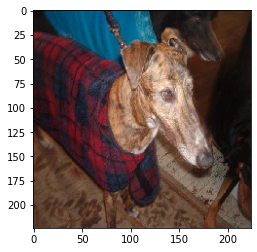

In [9]:
print('Train X shape:', X_train.shape)
print('Train y shape:', y_train.shape)
print('Test X shape:', X_test.shape)
print('Test y shape:', y_test.shape)

plt.imshow(X_train[0])

<h4>Load <i>{X_train_0, y_train_0, X_test_0, y_test_0} for</i> VGG16/ResNet50 (224,224,3)</h4>
<h4>Load <i>{X_train, y_train, X_test, y_test} for</i> InceptionV3 (299,299,3)</h4>

In [2]:
#(299,299,3)
#np.save('X_train.npy', X_train)
#np.save('y_train.npy', y_train)
# np.save('X_test.npy', X_test)
#np.save('y_test.npy', y_test)

X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

#(224,224,3)
# np.save('X_train_0.npy', X_train)
# np.save('y_train_0.npy', y_train)
# np.save('X_test_0.npy', X_test)
# np.save('y_test_0.npy', y_test)

# X_train = np.load('X_train_0.npy')
# y_train = np.load('y_train_0.npy')
# X_test = np.load('X_test_0.npy')
# y_test = np.load('y_test_0.npy')

In [3]:
print('Train X shape:', X_train.shape)
print('Train y shape:', y_train.shape)
print('Test X shape:', X_test.shape)
print('Test y shape:', y_test.shape)

Train X shape: (20000, 299, 299, 3)
Train y shape: (20000, 1)
Test X shape: (5000, 299, 299, 3)
Test y shape: (5000, 1)


<h4><i>Data Augmentation</i></h4>

In [14]:
data_generator = ImageDataGenerator(rotation_range = 15,
                                   horizontal_flip = True,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   zoom_range = [0.5,1.5],
                                   fill_mode = 'nearest',
                                   data_format = 'channels_last')
data_generator.fit(X_train)

In [15]:
valid_generator = ImageDataGenerator(data_format = 'channels_last')
valid_generator.fit(X_test)

<h4><i>Import a pre-trained model</i></h4>
<h3>VGG-16</h3>

In [15]:
vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(224,224,3))

#freeze all layers
for layer in vgg16.layers:
    layer.trainable = False

model3 = Sequential()
model3.add(vgg16)

model3.add(Flatten())

model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(1, activation='sigmoid'))

In [16]:
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3211392   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 17,926,209
Trainable params: 3,211,521
Non-trainable params: 14,714,688
_________________________________________________________________


In [17]:
compile_model(model3, 'adam', 'binary_crossentropy', 'accuracy')

<h4><i>Fit the model, Batch size 32 or 64</i></h4>

In [18]:
history2 = model3.fit(data_generator.flow(X_train, y_train, batch_size = 64), steps_per_epoch = len(X_train)//64, 
                      epochs = 15, verbose = 1, validation_data = valid_generator.flow(X_test, y_test, batch_size = 64), 
                      validation_steps = len(X_test)//64)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 312 steps, validate for 78 steps
Epoch 1/15
312/312 [==============================] - 231s 739ms/step - loss: 0.4215 - accuracy: 0.8186 - val_loss: 0.2192 - val_accuracy: 0.9073
Epoch 2/15
312/312 [==============================] - 215s 690ms/step - loss: 0.3287 - accuracy: 0.8572 - val_loss: 0.1913 - val_accuracy: 0.9213
Epoch 3/15
312/312 [==============================] - 218s 699ms/step - loss: 0.3213 - accuracy: 0.8585 - val_loss: 0.2012 - val_accuracy: 0.9133
Epoch 4/15
312/312 [==============================] - 217s 695ms/step - loss: 0.3029 - accuracy: 0.8667 - val_loss: 0.1987 - val_accuracy: 0.9155
Epoch 5/15
312/312 [==============================] - 218s 700ms/step - loss: 0.3025 - accuracy: 0.8670 - val_loss: 0.1876 - val_accuracy: 0.9253
Epoch 6/15
312/312 [==============================] - 222s 711ms/step - loss: 0.2879 - accuracy: 0.8753 - val_loss: 0.1856 - val_accuracy: 0.9249
Epoch 7/15
312/312 [===========

<h4><i>Matplotlib alternative</i></h4>

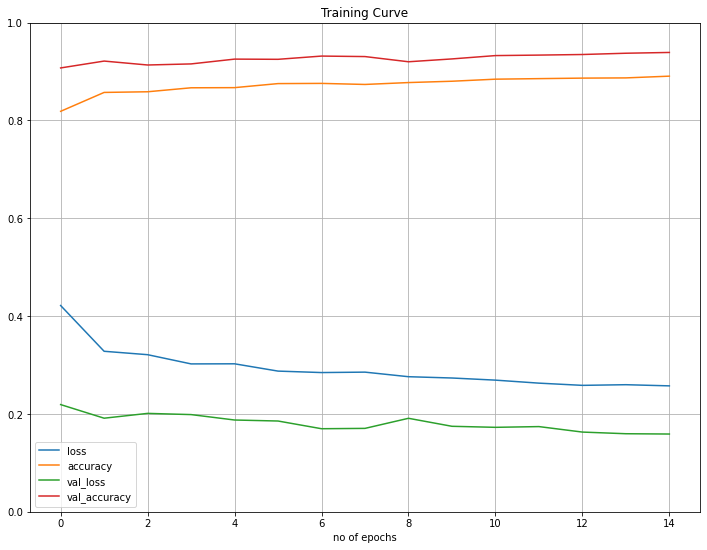

In [19]:
learning_curve(history2, 'Training Curve with Pre-trained VGG16')

<h4><i>Evaluating the test set</i></h4>

In [20]:
loss, accuracy = model3.evaluate(X_test, y_test)

print('Loss:', format(loss*100, ',.2f'),'% ||','Accuracy:',format(accuracy*100, ',.2f'),'%')

5000/5000 [==============================] - 20s 4ms/sample - loss: 0.1596 - accuracy: 0.9388
Loss: 15.96 % || Accuracy: 93.88 %


<h4><i>Save/load the model</i></h4>

In [25]:
#model3.save("Pre_trained_VGG16")
model3 = tensorflow.keras.models.load_model("Pre_trained_VGG16")

<h4><i>Model4 : Model (base) with <u>Global Average Pooling</u> instead of Fully Connected Layers</i></h4>

In [27]:
model4 = Sequential()

model4.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224, 224, 3)))
model4.add(BatchNormalization())
model4.add(MaxPooling2D((2, 2)))
model4.add(Dropout(0.2))

model4.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D((2, 2)))
model4.add(Dropout(0.2))

model4.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D((2, 2)))
model4.add(Dropout(0.2))

model4.add(GlobalAveragePooling2D())
model4.add(Dense(1, activation='sigmoid'))

In [29]:
model4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)       

In [30]:
compile_model(model4, 'adam', 'binary_crossentropy', 'accuracy')

In [31]:
history3 = model4.fit(data_generator.flow(X_train, y_train, batch_size = 32), steps_per_epoch = len(X_train)//32, 
                      epochs = 20, verbose = 1, validation_data = valid_generator.flow(X_test, y_test, batch_size = 32), 
                      validation_steps = len(X_test)//32)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 625 steps, validate for 156 steps
Epoch 1/20
625/625 [==============================] - 237s 379ms/step - loss: 0.6374 - accuracy: 0.6280 - val_loss: 0.6230 - val_accuracy: 0.6607
Epoch 2/20
625/625 [==============================] - 218s 349ms/step - loss: 0.5916 - accuracy: 0.6797 - val_loss: 0.5549 - val_accuracy: 0.7085
Epoch 3/20
625/625 [==============================] - 211s 338ms/step - loss: 0.5667 - accuracy: 0.7028 - val_loss: 0.8105 - val_accuracy: 0.6599
Epoch 4/20
625/625 [==============================] - 217s 347ms/step - loss: 0.5366 - accuracy: 0.7327 - val_loss: 0.5475 - val_accuracy: 0.7312
Epoch 5/20
625/625 [==============================] - 210s 336ms/step - loss: 0.5073 - accuracy: 0.7522 - val_loss: 0.6108 - val_accuracy: 0.7248
Epoch 6/20
625/625 [==============================] - 209s 334ms/step - loss: 0.4852 - accuracy: 0.7643 - val_loss: 0.4586 - val_accuracy: 0.7859
Epoch 7/20
625/625 [==========

<h3>Inception V3</h3>

In [12]:
inceptionv3 = InceptionV3(include_top=False, weights='imagenet', input_shape=(299,299,3))

<h4><i>Model Architecture</i></h4>

In [13]:
inceptionv3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [17]:
#freeze all layers
for layer in inceptionv3.layers:
    layer.trainable = False

model5 = Sequential()
model5.add(inceptionv3)

model5.add(GlobalAveragePooling2D())
model5.add(Dense(1, activation='sigmoid'))

In [18]:
compile_model(model5, 'adam', 'binary_crossentropy', 'accuracy')

In [19]:
history4 = model5.fit(data_generator.flow(X_train, y_train, batch_size = 32), steps_per_epoch = len(X_train)//32, 
                      epochs = 3, verbose = 1, validation_data = valid_generator.flow(X_test, y_test, batch_size = 32), 
                      validation_steps = len(X_test)//32)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 625 steps, validate for 156 steps
Epoch 1/3
625/625 [==============================] - 458s 732ms/step - loss: 0.1844 - accuracy: 0.9346 - val_loss: 0.0982 - val_accuracy: 0.9671
Epoch 2/3
625/625 [==============================] - 458s 733ms/step - loss: 0.1199 - accuracy: 0.9522 - val_loss: 0.1088 - val_accuracy: 0.9619
Epoch 3/3
625/625 [==============================] - 459s 734ms/step - loss: 0.1080 - accuracy: 0.9578 - val_loss: 0.0480 - val_accuracy: 0.9844


In [22]:
history4 = model5.fit(data_generator.flow(X_train, y_train, batch_size = 32), steps_per_epoch = len(X_train)//32, 
                      epochs = 2, verbose = 1, validation_data = valid_generator.flow(X_test, y_test, batch_size = 32), 
                      validation_steps = len(X_test)//32)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 625 steps, validate for 156 steps
Epoch 1/2
625/625 [==============================] - 459s 735ms/step - loss: 0.1098 - accuracy: 0.9560 - val_loss: 0.0644 - val_accuracy: 0.9786
Epoch 2/2
625/625 [==============================] - 446s 713ms/step - loss: 0.0987 - accuracy: 0.9608 - val_loss: 0.0437 - val_accuracy: 0.9862


In [4]:
#model5.save("Pre_trained_Inception")
model5 = tensorflow.keras.models.load_model("Pre_trained_Inception")

In [24]:
loss, accuracy = model5.evaluate(X_test, y_test)

print('Loss:', format(loss*100, ',.2f'),'% ||','Accuracy:',format(accuracy*100, ',.2f'),'%')

5000/5000 [==============================] - 16s 3ms/sample - loss: 0.0438 - accuracy: 0.9860
Loss: 4.38 % || Accuracy: 98.60 %


<img src="inception.jpg">
<center><h4>Credit: WarnerBros.com</h4></center>

<h3>ResNet50</h3>

In [16]:
resnet50 = ResNet50(include_top=False, input_shape=(224,224,3), weights='imagenet')

In [17]:
resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [18]:
#freeze all layers
for layer in resnet50.layers:
    layer.trainable = False

model6 = Sequential()
model6.add(resnet50)

model6.add(GlobalAveragePooling2D())
model6.add(Dense(1, activation='sigmoid'))

In [19]:
model6.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2049      
Total params: 23,589,761
Trainable params: 2,049
Non-trainable params: 23,587,712
_________________________________________________________________


In [20]:
compile_model(model6, 'adam', 'binary_crossentropy', 'accuracy')

In [21]:
history5 = model6.fit(data_generator.flow(X_train, y_train, batch_size = 32), steps_per_epoch = len(X_train)//32, 
                      epochs = 5, verbose = 1, validation_data = valid_generator.flow(X_test, y_test, batch_size = 32), 
                      validation_steps = len(X_test)//32)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 625 steps, validate for 156 steps
Epoch 1/5
625/625 [==============================] - 225s 360ms/step - loss: 0.1729 - accuracy: 0.9298 - val_loss: 1.8310 - val_accuracy: 0.5028
Epoch 2/5
625/625 [==============================] - 205s 328ms/step - loss: 0.1295 - accuracy: 0.9479 - val_loss: 1.9414 - val_accuracy: 0.5028
Epoch 3/5
625/625 [==============================] - 203s 325ms/step - loss: 0.1196 - accuracy: 0.9518 - val_loss: 1.9068 - val_accuracy: 0.5028
Epoch 4/5
625/625 [==============================] - 207s 331ms/step - loss: 0.1164 - accuracy: 0.9523 - val_loss: 2.0968 - val_accuracy: 0.5028
Epoch 5/5
625/625 [==============================] - 216s 346ms/step - loss: 0.1142 - accuracy: 0.9536 - val_loss: 1.7119 - val_accuracy: 0.5028


<h2>Performance Metrics</h2>

In [38]:
#I have chosen Inception (i.e. model 5)
#evaluate on test set
loss, accuracy = model5.evaluate(X_test, y_test)

print('Loss:', format(loss*100, ',.2f'),'% ||','Accuracy:',format(accuracy*100, ',.2f'),'%')

5000/5000 [==============================] - 19s 4ms/sample - loss: 0.0438 - accuracy: 0.9860
Loss: 4.38 % || Accuracy: 98.60 %


In [20]:
#predict on test set
pred = model5.predict(X_test)

In [24]:
#convert probabilites to class labels
pred[pred > 0.5] = 1.
pred[pred <= 0.5] = 0.

In [109]:
print(pred)

[[1.]
 [0.]
 [1.]
 ...
 [1.]
 [0.]
 [1.]]


<h4><i>Confusion matrix using scikit plot.</i></h4>

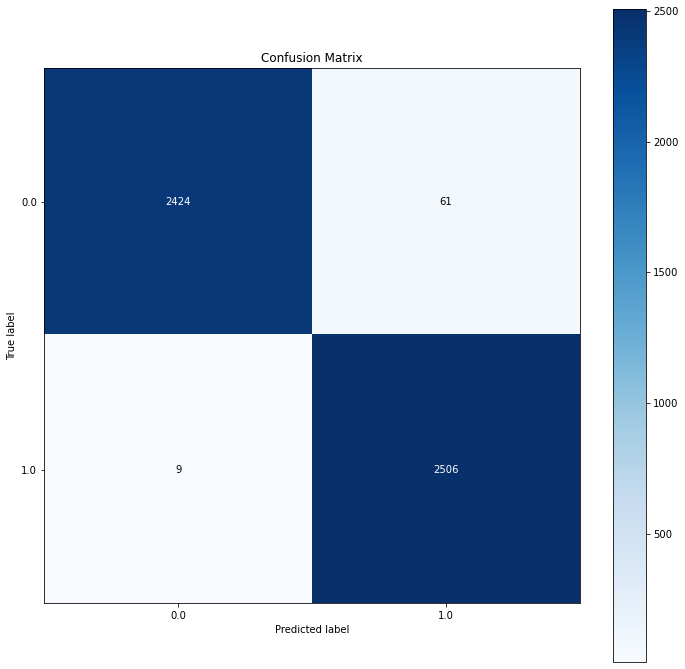

In [40]:
skplt.metrics.plot_confusion_matrix(
    y_test, 
    pred,
    figsize=(12,12))

<h4><i>Classification Report</i></h4>

In [110]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      2485
         1.0       0.98      1.00      0.99      2515

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



In [ ]:
categories = ['Dog', 'Cat']

In [102]:
#model 5 uses image of dims (299,299,3) (inception)
def import_and_scale(filename):
    test_img = load_img(filename, target_size=(299, 299))
    test_img = img_to_array(test_img)
    test_img = test_img.astype('float32')
    test_img = test_img/255
    plt.imshow(test_img)
    test_img = test_img.reshape(1, 299, 299, 3)
    return test_img

def show_prediction(image):
    pred_final = model5.predict(image)
    pred_final[pred_final > 0.5] = 1
    pred_final[pred_final <= 0.5] = 0
    pred_final = np.squeeze(pred_final)
    pred_final = pred_final.astype(int)
    print('This is a', categories[pred_final])

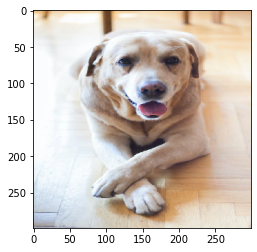

In [112]:
img = import_and_scale('dog.jpg')

In [113]:
show_prediction(img)

This is a Dog


<h2>Comparison</h2>

In [119]:
print('-----------------------------------------------------------------------------------------------------------------------')
print('model - Base Model(3-block VGG):','Loss: 49.91 % || Accuracy: 83.92 %')
print('\n')
print('model1 - Base Model with L2:','Loss: 68.83 % || Accuracy: 77.70 %')
print('\n')
print('model2 - Base Model with Augmented Data:','Loss: 37.09 % || Accuracy: 87.00 %')
print('\n')
print('model3 - Pre-trained VGG16 with Augmentation:','Loss: 15.96 % || Accuracy: 93.88 %')
print('\n')
print('model4 - Base model with Global Average Pooling:','Loss: 31.78 % || Accuracy: 74.58 % (Bad epoch :p)')
print('\n')
print('model5 - Pre-trained InceptionV3 with Augmentation, Global Average Pooling:','Loss: 4.38 % || Accuracy: 98.60 %')
print('-----------------------------------------------------------------------------------------------------------------------')

-----------------------------------------------------------------------------------------------------------------------
model - Base Model(3-block VGG): Loss: 49.91 % || Accuracy: 83.92 %


model1 - Base Model with L2: Loss: 68.83 % || Accuracy: 77.70 %


model2 - Base Model with Augmented Data: Loss: 37.09 % || Accuracy: 87.00 %


model3 - Pre-trained VGG16 with Augmentation: Loss: 15.96 % || Accuracy: 93.88 %


model4 - Base model with Global Average Pooling: Loss: 31.78 % || Accuracy: 74.58 % (Bad epoch :p)


model5 - Pre-trained InceptionV3 with Augmentation, Global Average Pooling: Loss: 4.38 % || Accuracy: 98.60 %
-----------------------------------------------------------------------------------------------------------------------


<center><img src="Calvin_andco.png"></center>
<center><h4>Credit: Calvin_andco (Instagram)</h4></center>

<h2>References:</h2>
<h4><a href="https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/">[1] machinelearningmastery.com </a></h4>
<h4><a href="https://github.com/jonkrohn/DLTFpT">[2] John Krohn</a></h4>